In [1]:
from skimage import io
from skimage.feature import blob_log
import os
import matplotlib.pyplot as plt
from skimage.morphology import white_tophat, disk
import numpy as np

In [2]:
image_dir = "/media/tool/moved_from_m2/cartana_test_stitched/results/tiled_ref"

In [3]:
def whiteFilter(image, radius):
    selem = disk(radius)
    image = white_tophat(image,selem)
    return image

In [18]:
def detectSpots(image, min_sigma=1, max_sigma=10):
    image = image.astype('uint8')
    blobs = blob_log(image, min_sigma=int(min_sigma), max_sigma=int(max_sigma))
    return blobs.astype(int)


In [5]:
image = io.imread("/media/tool/moved_from_m2/cartana_test_stitched/results/tiled_ref/REF_padded_tiled_37.tif")

In [32]:
blobs = detectSpots(whiteFilter(image,10), 1,3)

In [26]:
print(blobs)
print(blobs.shape)

[[ 192 1393    1]
 [ 194  488    1]
 [ 527 1012    1]
 ...
 [ 530  987    1]
 [1823 1566    1]
 [ 126 1515    1]]
(24214, 3)


In [27]:
print(image.shape)
empty_array = np.zeros(image.shape)


(2120, 2120)


In [28]:
for x in blobs:
    empty_array[x[0], x[1]] = 255

In [29]:
print(empty_array.shape)

(2120, 2120)


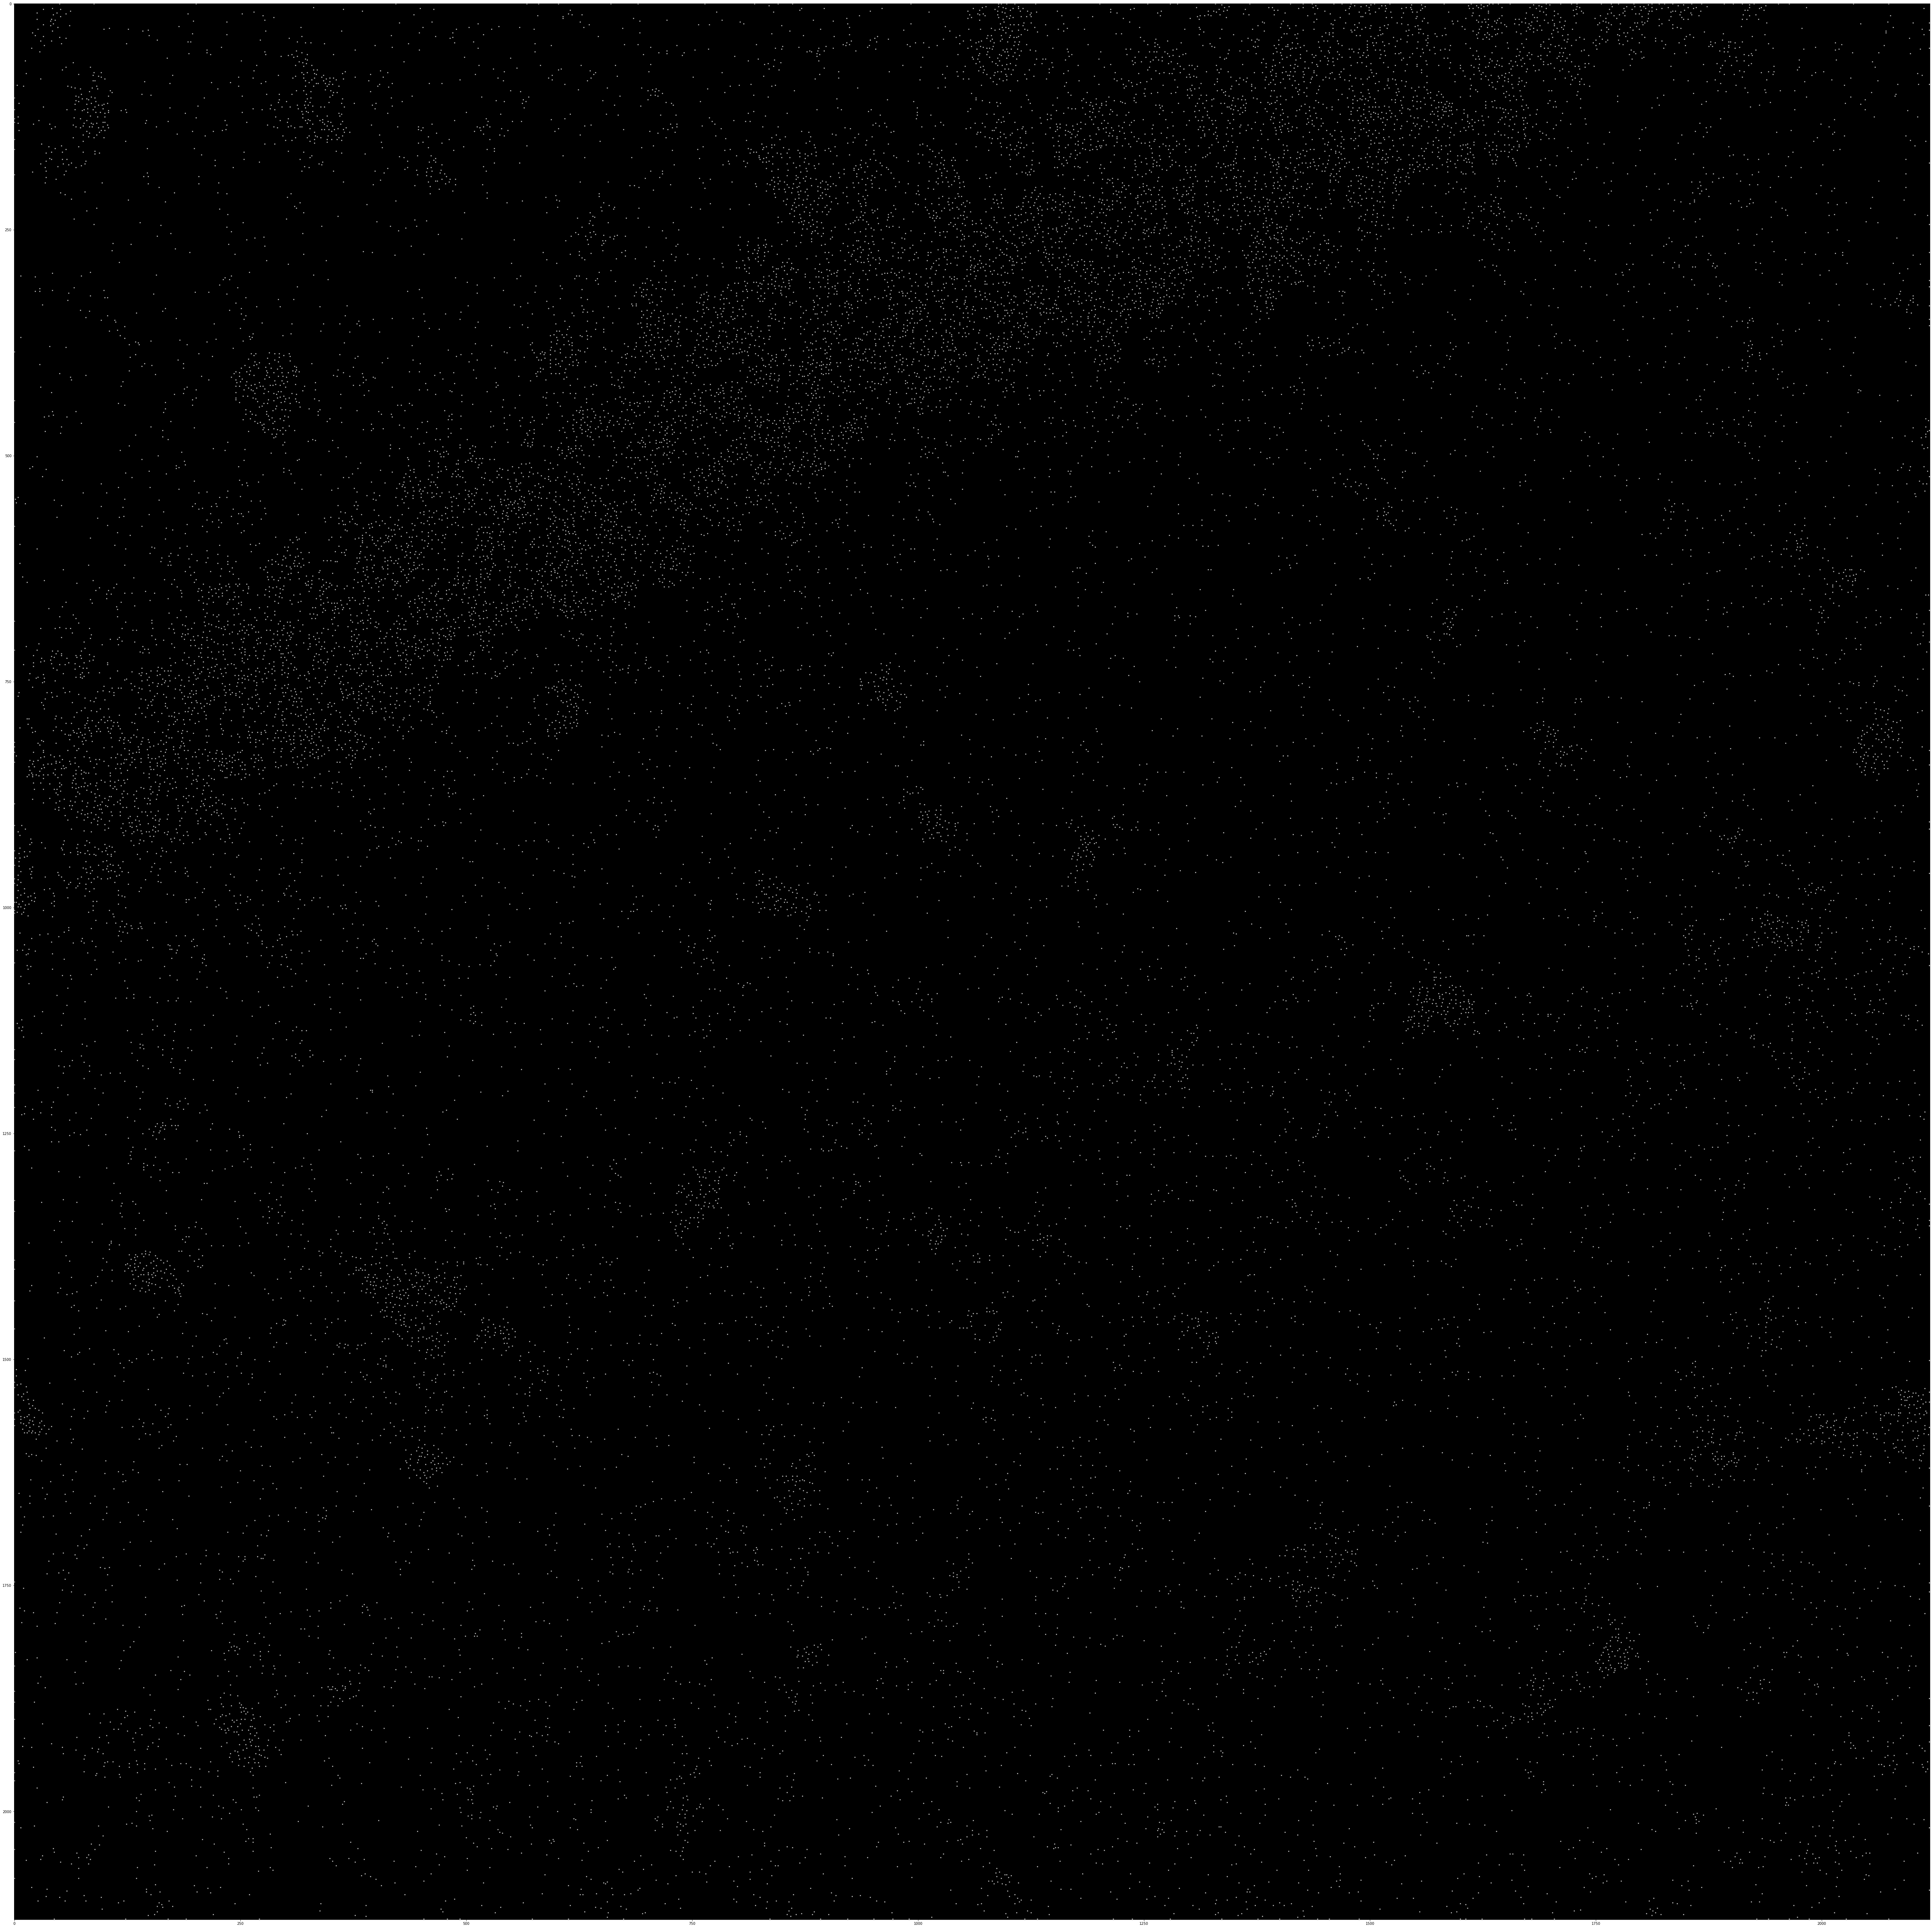

In [31]:
plt.rcParams['figure.figsize'] = [100, 100]
plt.imshow(empty_array, cmap='gray')
# plt.savefig("/home/nacho/Documents/Code/communISS/empty_array.tif")

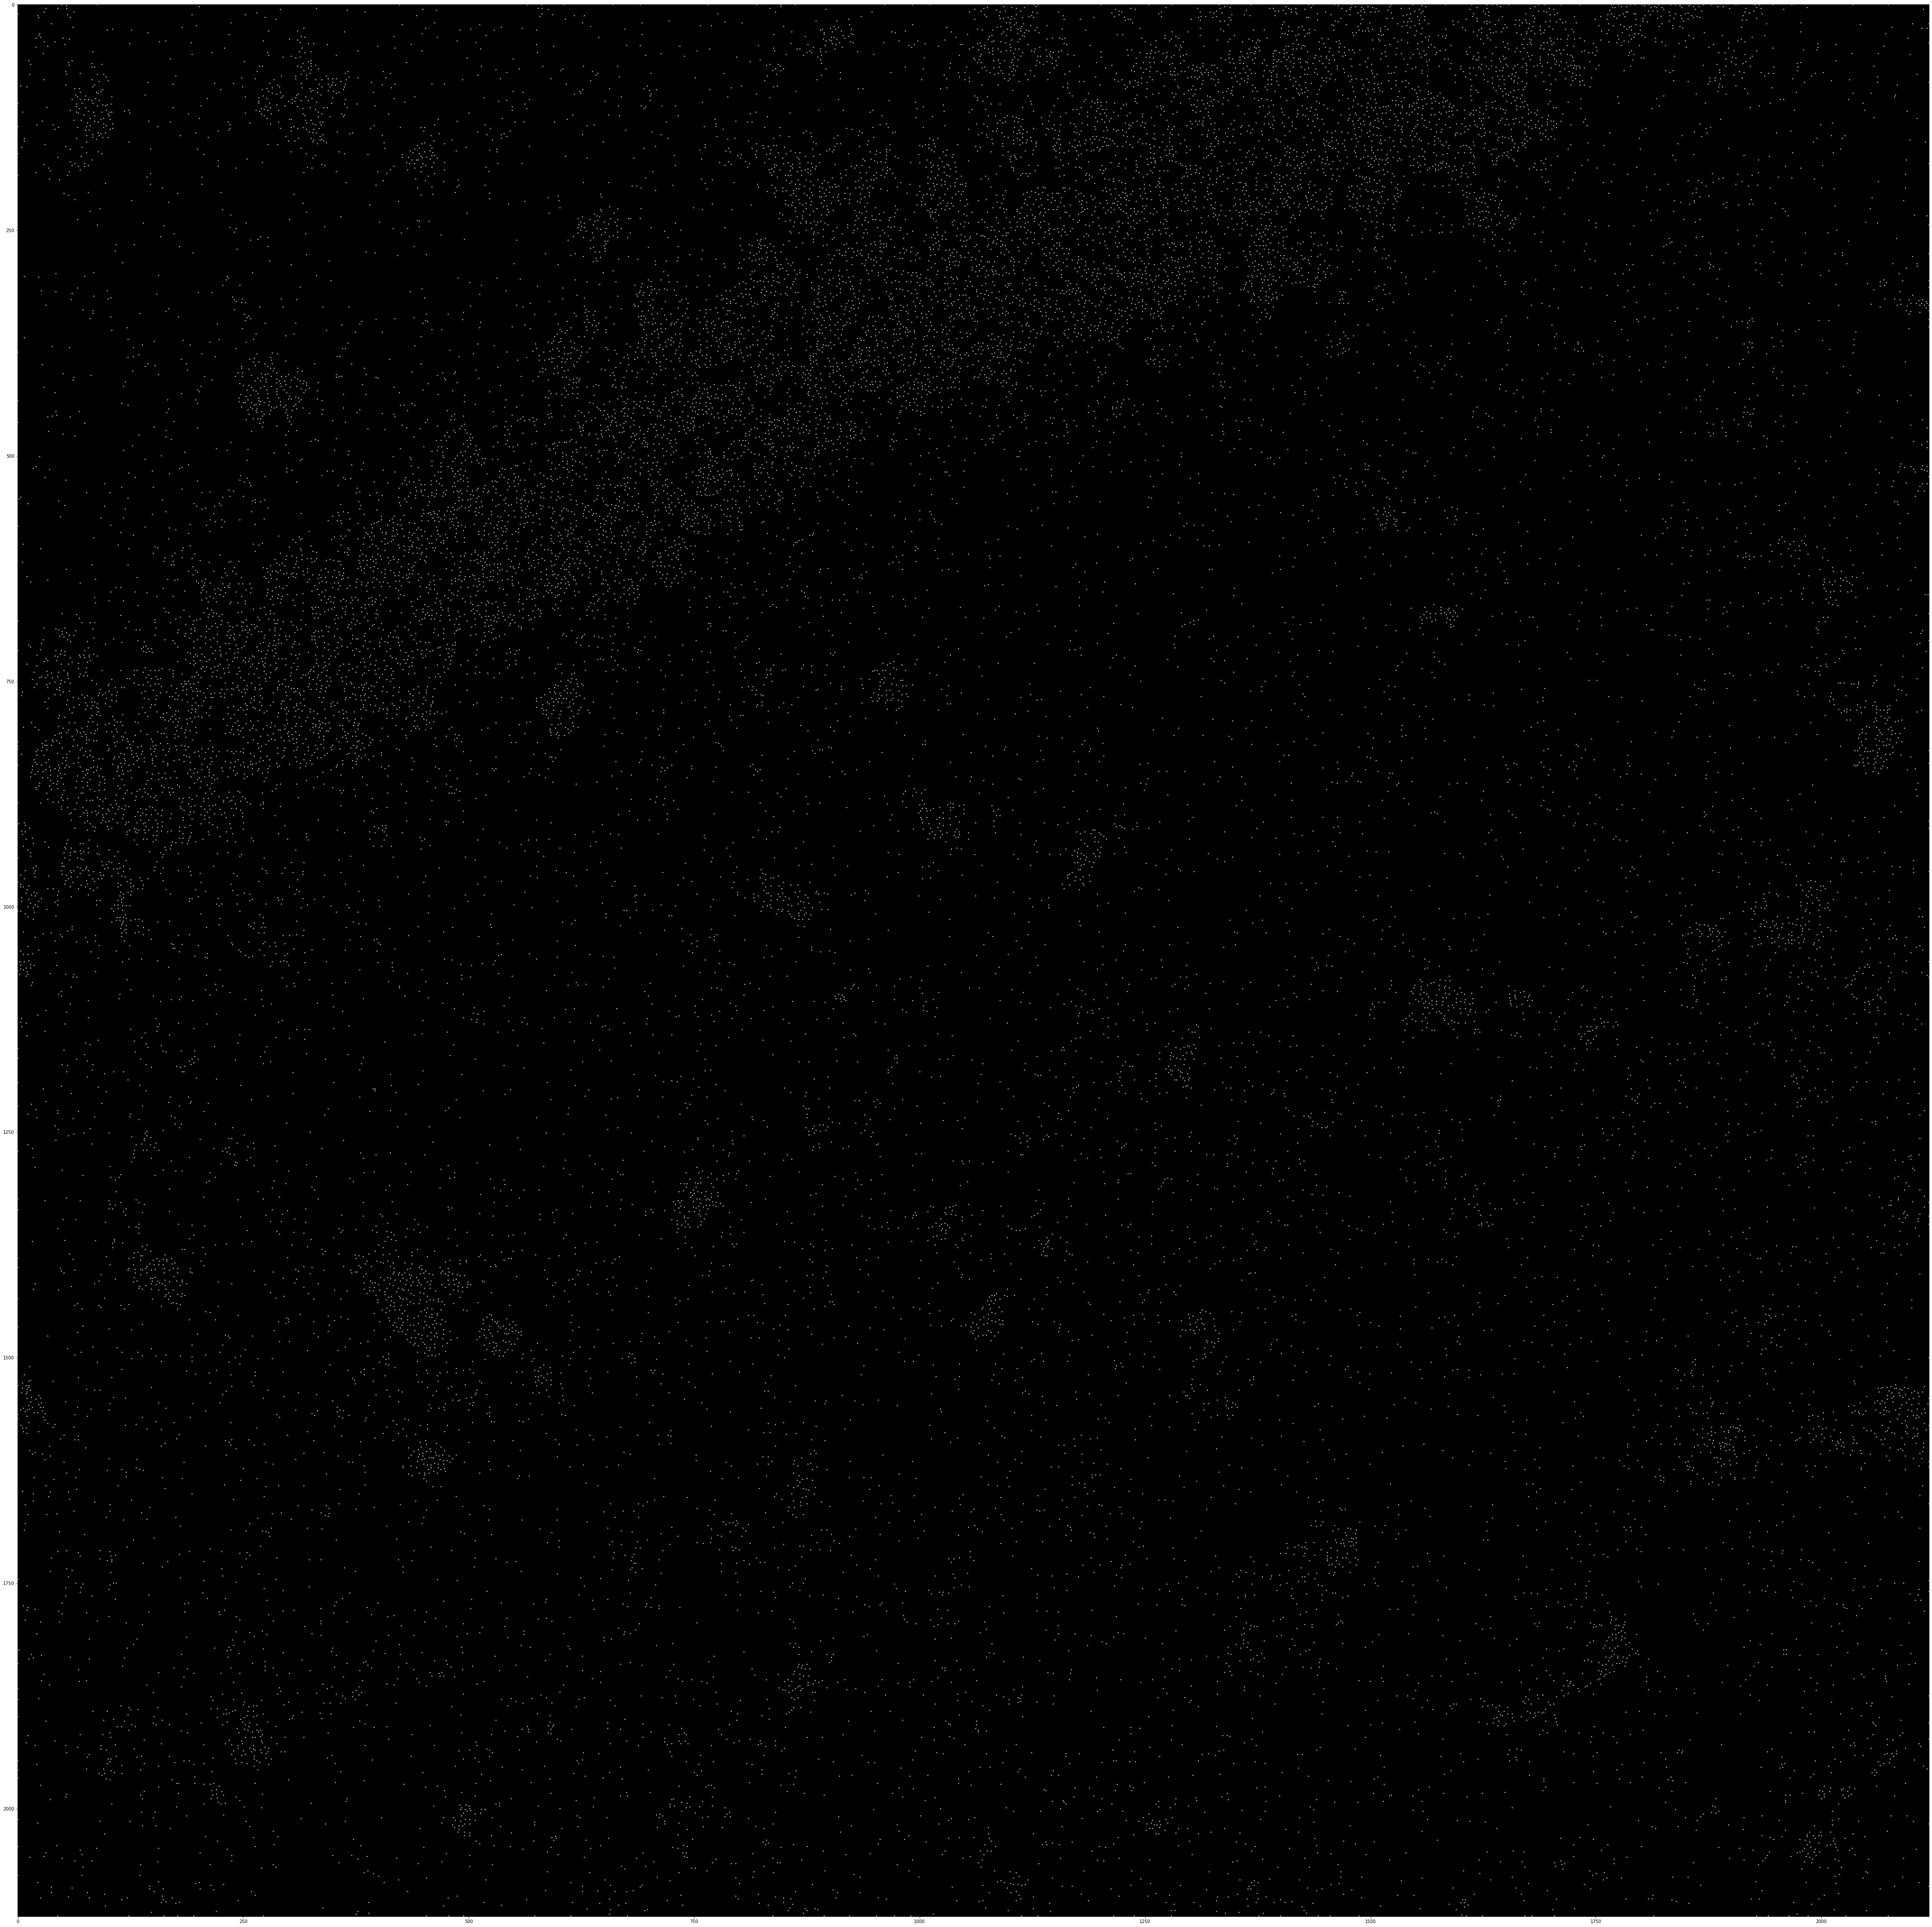

In [81]:
plt.rcParams['figure.figsize'] = [80, 80]
def allTogether():
    image = io.imread("/media/tool/moved_from_m2/cartana_test_stitched/results/tiled_ref/REF_padded_tiled_37.tif")
    blobs = detectSpots(whiteFilter(image,15), 1,10)
    empty_array = np.zeros(image.shape)
    for x in blobs:
        empty_array[x[0], x[1]] = 255
    plt.imshow(empty_array, cmap='gray')
    plt.savefig("/home/nacho/Documents/Code/communISS/empty_array.tif")
allTogether()